In [29]:
import os
import sys
import time

import pandas as pd
from matplotlib import pyplot as plt

from utils import csv_find, df_encode
from pymoo_problem import SortOpt
from obj_strategy import init_x, sub_fixed_seq, preprocess

%matplotlib inline

In [30]:
cwd_path = "/home/WangC/Competition/PymooAPS/"
if sys.platform.startswith('win32'):
    cwd_path = cwd_path[:cwd_path.rfind('\\')]
else:
    cwd_path = cwd_path[:cwd_path.rfind('/')]

start_all = time.time()
abs_path = os.path.join(cwd_path,'Data')
paths = csv_find(abs_path + '/raw')
paths.sort(reverse=False, key=lambda x: ''.join(x.split('/')[-1].split('.')[0].split('-')[1:]))
print("paths length:{}".format(len(paths)))

date = []
raw_len = []
opt_len = []

for opt_path in paths:
    data = pd.read_csv(opt_path, index_col=0)
    problem = SortOpt(data)
    
    date.append(''.join(opt_path.split('/')[-1].split('.')[0].split('-')[2:]))
    raw_len.append(int(problem.f_baseline[0]['car_category_switch']))
    seq = sub_fixed_seq(data)
    opt_len.append(len(seq.keys())-1)

paths length:53


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

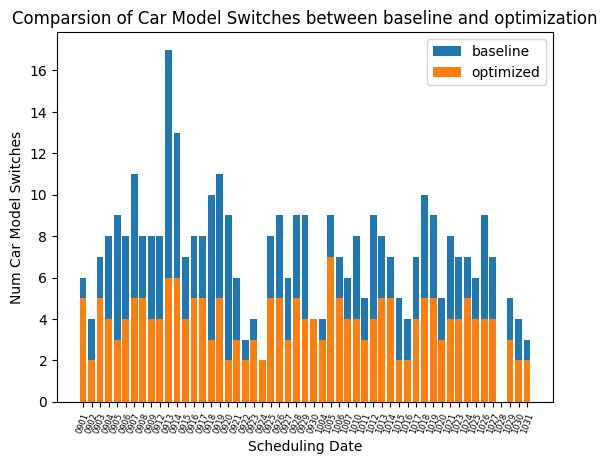

In [34]:
raw_bar = plt.bar(date, raw_len, label='baseline')
opt_bar = plt.bar(date, opt_len, label='optimized')
plt.xlabel('Scheduling Date')
plt.xticks(rotation=70, fontsize=6)
plt.ylabel('Num Car Model Switches')
plt.title('Comparsion of Car Model Switches between baseline and optimization')
plt.legend()
plt.show()